#### Question 4

(a)
create two arrays to data
take slug as $x$, elevation as $y$
cal the $\beta_1$ and $\beta_2$ value

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [4]:
y = np.array([0.480,0.605,0.530,0.505,0.505,0.625,0.550
          ,0.510,0.570,0.5,0.535])
x = np.array([160,616,1050,130,20,5277,350,63,465,10,566])
x_bar = np.mean(x)
y_bar = np.mean(y)
n = x.shape[0]

Sxx = np.sum(np.square(x)) - n*x_bar*x_bar
Sxy = np.sum(x*y) - n*x_bar*y_bar

beta_1 = Sxy/Sxx
beta_0 = y_bar - beta_1*x_bar

print('beta_0 is ', beta_0)
print('beta_1 is ', beta_1)

beta_0 is  0.5207848203039731
beta_1 is  2.140426974345895e-05


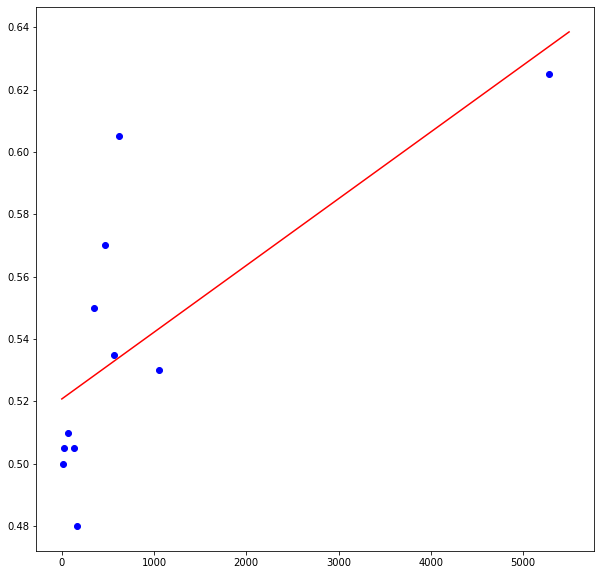

In [5]:
plt.figure(figsize = (10, 10))
# create a point plot
plt.plot(x, y, 'bo')
plt.plot([0, 5500], [beta_1*x + beta_0 for x in [0, 5500]], 'r')
plt.show()

(b) 
test the null hypothesis with T test that the slope $\beta_1 = 0$, and the alternate $\beta_1 \neq 0$

$H_0: \beta_1 = 0$ Null hypothesis

$H_1: \beta_1 \neq 0$ Alternatee hypothesis

In [6]:
SSE = 0
for i in range(len(x)):
    SSE += (y[i] - beta_0 - beta_1*x[i])**2

sigma_est = (SSE / (len(x) - 2))**0.5
SE_b_1 = (sigma_est**2 / Sxx)**0.5
t = (beta_1 - 0) / SE_b_1
print('t is ', t)

t is  3.0195982888864057


By checking the T table, with $df = 11 - 2 = 9, a/2 = 0.005\Rightarrow t_{0.005,9}=3.25$

Because $t<t_{0.005,9}$, fail to the null hypothesis. Conclude that $\beta_1$ is not contributing to $\hat{y}$

(c) draw the least squares line

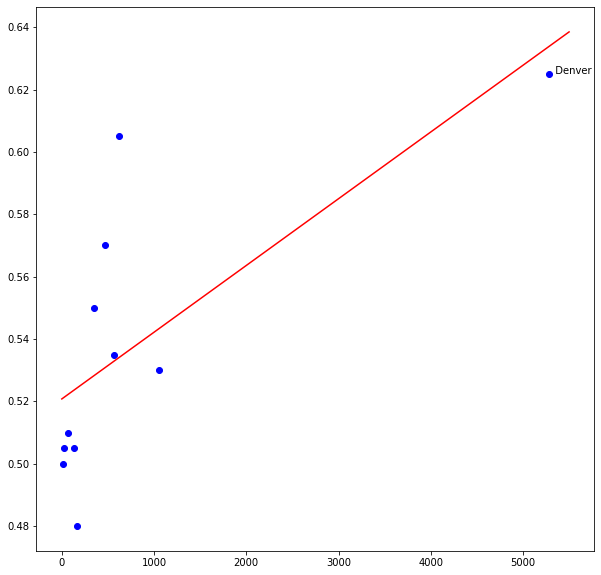

In [7]:
plt.figure(figsize = (10, 10))
# create a point plot
plt.plot(x, y, 'bo')
plt.plot([0, 5500], [beta_1*x + beta_0 for x in [0, 5500]], 'r')
plt.annotate('  Denver', (x[5], y[5]))
plt.show()

I found that the data from Denver has a large shift from other points. It could be a data error and affect the model.

(d) remove Denver

beta_0 is  0.5070435999035114
beta_1 is  6.401282826964629e-05
t is  1.969872195962768


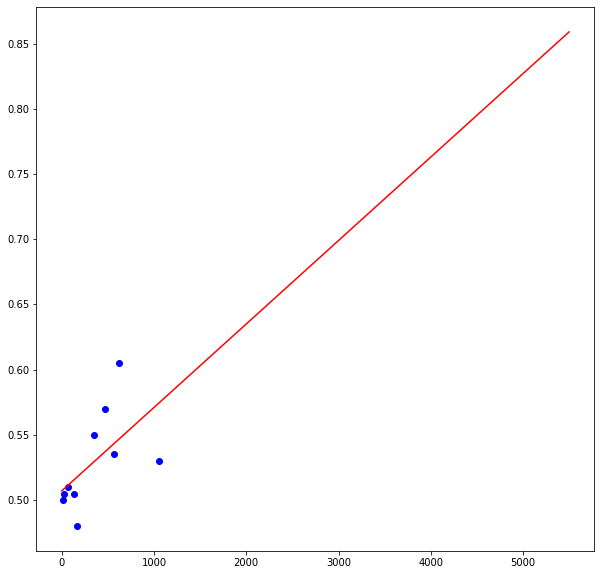

In [8]:
y = np.array([0.480,0.605,0.530,0.505,0.505,0.550
          ,0.510,0.570,0.5,0.535])
x = np.array([160,616,1050,130,20,350,63,465,10,566])
x_bar = np.mean(x)
y_bar = np.mean(y)
n = x.shape[0]

Sxx = np.sum(np.square(x)) - n*x_bar*x_bar
Sxy = np.sum(x*y) - n*x_bar*y_bar

beta_1 = Sxy/Sxx
beta_0 = y_bar - beta_1*x_bar

print('beta_0 is ', beta_0)
print('beta_1 is ', beta_1)
SSE = 0
for i in range(len(x)):
    SSE += (y[i] - beta_0 - beta_1*x[i])**2

sigma_est = (SSE / (len(x) - 2))**0.5
SE_b_1 = (sigma_est**2 / Sxx)**0.5
t = (beta_1 - 0) / SE_b_1
print('t is ', t)
plt.figure(figsize = (10, 10))
# create a point plot
plt.plot(x, y, 'bo')
plt.plot([0, 5500], [beta_1*x + beta_0 for x in [0, 5500]], 'r')
plt.show()

After removing Denver's data, we have $t=1.97<t_{0.005,8}=3.355$. So we still fail to  reject $H_0$ which means that $\beta_1$ is not contributing to $\hat{y}$. The elevation has no effect on slugging percentage.

---

#### Question 5
In general categories situation, we need $n-1$ dummy variables (n is the number of categories -- 3 in this case). In this case, we only have one dummy variable which might conduct to error.
we could have an alternative model $\hat{y}=\beta_0+\beta_1x_1+\beta_2x_2+\beta_3x_3$, notice that $x$ is discrete and only has two values 0 or 1. So the average salary for each level should be $\bar{y_0}=\beta_0, \bar{y_1}=\beta_0+\beta_1, \bar{y_2}=\beta_0+\beta_1+\beta_2, \bar{y_3}=\beta_0+\beta_1+\beta_2+\beta_3$

---
#### Project

In [10]:
file_name = 'BostonHousingData.xlsx'
df = pd.read_excel(file_name)

In [14]:
# show some basic info about the data
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [13]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [15]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


After observating the data, there is no need for data wrangling since there is no missing data

In [16]:
# use corr() to find the features that is most correlated with the MEDV
df.corr()['MEDV'].sort_values()

LSTAT     -0.737663
PTRATIO   -0.507787
INDUS     -0.483725
TAX       -0.468536
NOX       -0.427321
CRIM      -0.388305
RAD       -0.381626
AGE       -0.376955
CHAS       0.175260
DIS        0.249929
B          0.333461
ZN         0.360445
RM         0.695360
MEDV       1.000000
Name: MEDV, dtype: float64

##### Implement simple linear regression for prediction

In [126]:
# use statsmodels to fit a model
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [127]:
# fit LSTAT with MEDV
model = smf.ols('MEDV ~ LSTAT', data=df)
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Wed, 04 Mar 2020   Prob (F-statistic):           5.08e-88
Time:                        01:24:54   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.000      33.448      35.659
LSTAT         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

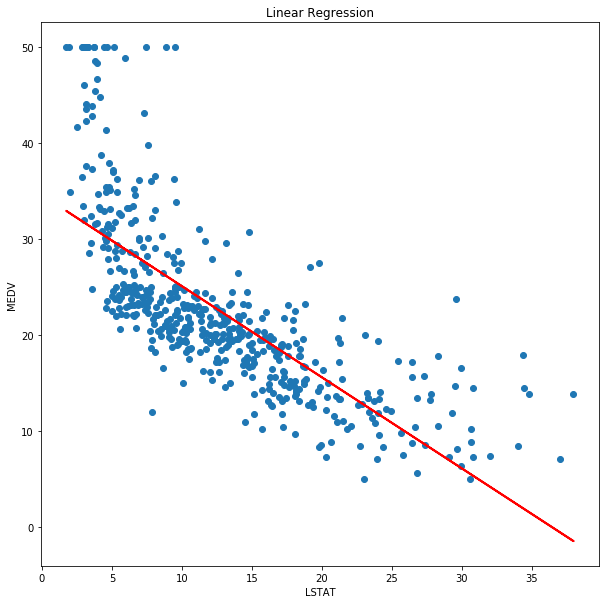

In [128]:
# Predict values
pred = model.predict()
# Plot regression against actual data
plt.figure(figsize=(10,10))
plt.plot(df['LSTAT'], df['MEDV'], 'o')           # scatter plot showing actual data
plt.plot(df['LSTAT'], pred, 'r', linewidth=2)   # regression line
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.title('Linear Regression')
plt.show()

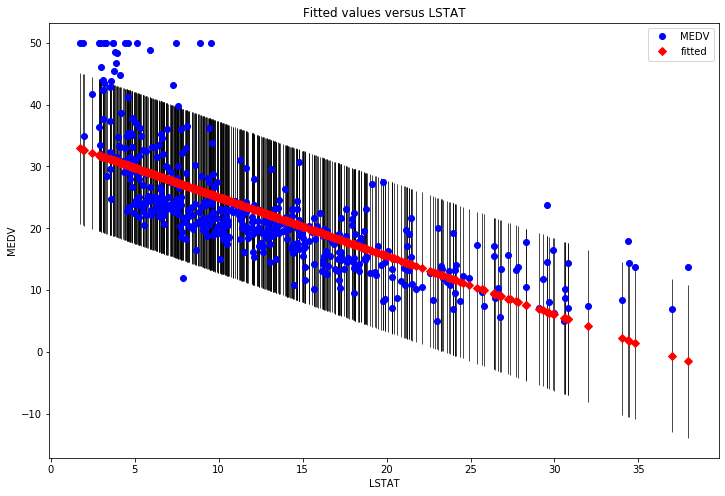

In [129]:
fig, ax = plt.subplots(figsize=(12, 8))
fig = sm.graphics.plot_fit(model, "LSTAT", ax=ax)

In [130]:
model = smf.ols('MEDV ~ LSTAT + PTRATIO + RM + INDUS', data=df)
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                     264.5
Date:                Wed, 04 Mar 2020   Prob (F-statistic):          5.41e-122
Time:                        01:25:01   Log-Likelihood:                -1553.0
No. Observations:                 506   AIC:                             3116.
Df Residuals:                     501   BIC:                             3137.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     18.6150      3.927      4.741      0.000      10.900      26.330
LSTAT         -0.5757      0.048    -12.023      0.000      -0.670      -0.482
PTRATIO       -0.9351      0.120     -7.763      0.000      -1.172      -0.698
RM             4.5152      0.426     10.592      0.000       3.678       5.353
INDUS          0.0076      0.044      0.174      0.862      -0.078       0.093
==============================================================================
Omnibus:                      200.524   Durbin-Watson:                   0.903
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1003.887
Skew:                           1.689   Prob(JB):                    1.02e-218
Kurtosis:                       9.017   Cond. No.                         452.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

---

---

---

---

---

---

---

---

In [9]:
import pandas as pd
import statsmodels.api as sm
# from sklearn.model_seletcion import train_test_split
boston_df = pd.read_excel('./BostonHousingData.xlsx', sheet_name = 'HousingData')
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [42]:
# target = boston_df
# for col in boston_df.columns:
#     print(col)

In [43]:
x=boston_df['LSTAT'].to_numpy()
y=boston_df['MEDV'].to_numpy()

# x_train,x_test,y_train,y_test=train_test_split(df,y,test_size=0.3,random_state=50)
n = x.shape[0]

x_bar = np.mean(x)
y_bar = np.mean(y)

S_x_x = np.sum(np.square(x)) - n*x_bar*x_bar
S_x_y = np.sum(x*y) - n*x_bar*y_bar

beta_1 = S_x_y/S_x_x
beta_0 = y_bar - beta_1*x_bar

print('beta_0 is ', beta_0)
print('beta_1 is ', beta_1)

beta_0 is  34.553840879383145
beta_1 is  -0.950049353757994


<module 'matplotlib.pyplot' from '/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/matplotlib/pyplot.py'>

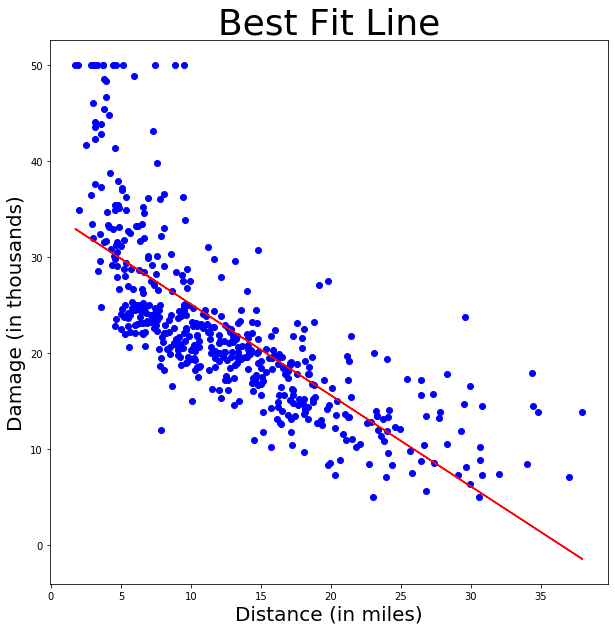

In [44]:
# %matplotlibe inline
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.plot(x, y, 'bo')
plt.plot(x, [beta_1*z + beta_0 for z in x], 'r-')

plt.title('Best Fit Line', fontsize=36)
plt.xlabel('Distance (in miles)', fontsize=20)
plt.ylabel('Damage (in thousands)', fontsize=20)

plt


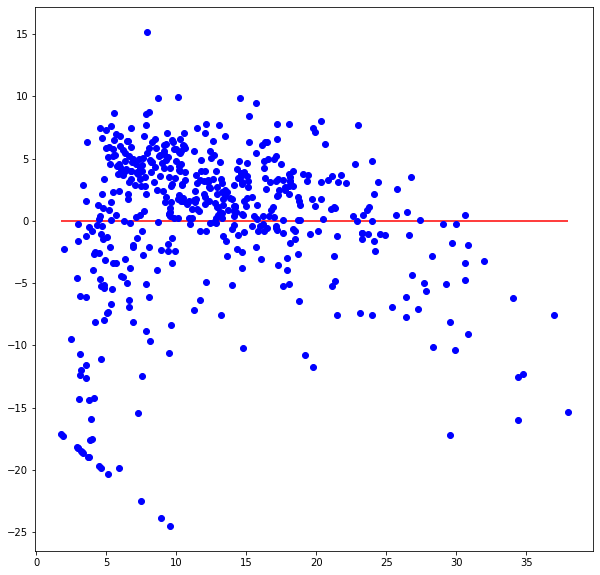

In [45]:
# confidence interval
# null hypotheses test
# statsmodel.api
expect=np.array([beta_1*z + beta_0 for z in x])
error=expect-y
plt.figure(figsize=(10,10))
plt.plot(x, error, 'bo')
# plt.plot(x,[0*len(x)],'r-')
plt.hlines(0,min(x),max(x),'r')

In [ ]:
# 2 simple liner regression
# 1 mulipule liner regression
# 1 not liner regression
# find the r^2 closet to 1
# x_train =sm.add_constant(X_train)
# model=sm.OLS(Y_train,X_train).fit()
# s=model.summary
# print(s)
